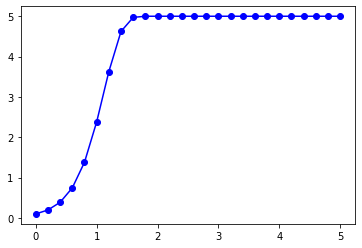

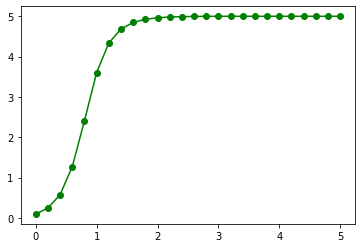

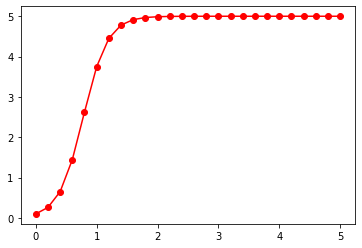

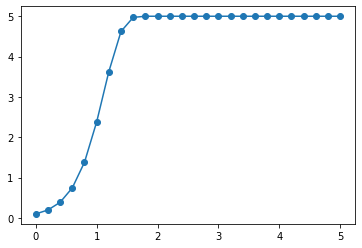

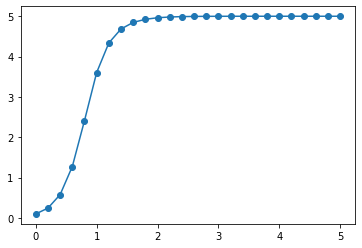

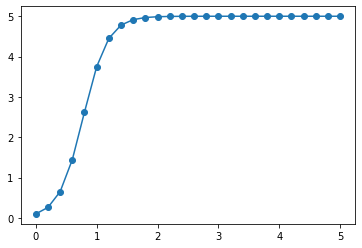

No handles with labels found to put in legend.


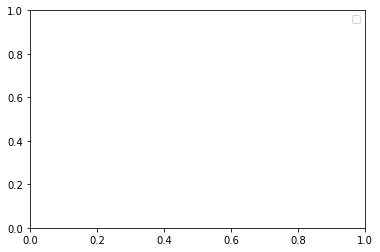

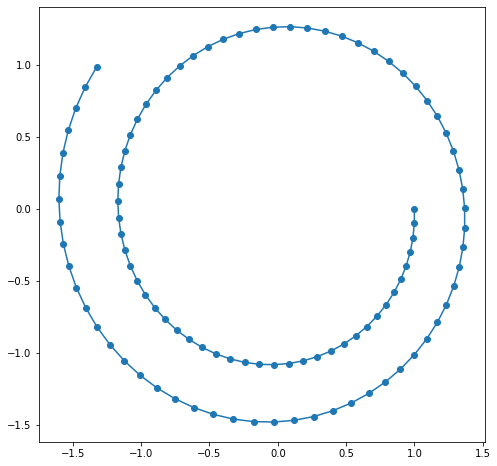

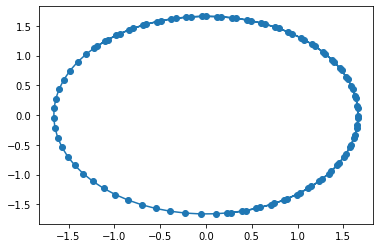

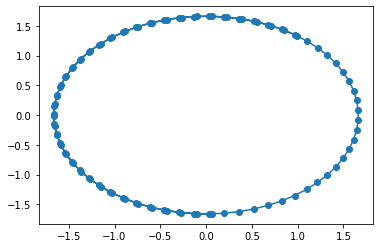

No handles with labels found to put in legend.


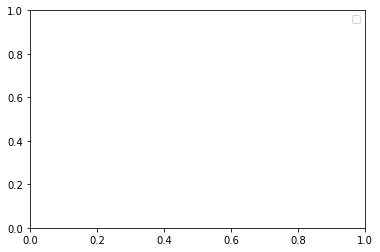

In [22]:

# Las funciones euler en ecuaciones diferenciales es mas facil de resolver con vectores.

from pylab import *  # Esta parte nos importa los componentes para graficar el resultado.

def euler_c(x0, t_final, dt, f):
    lista_t = []
    lista_x = []

    a = x0
    t = 0.

    while t < t_final + dt:  # Nos permite incluir la variable en el metodo
        lista_t.append(t)
        lista_x.append(a)

        a += dt * f(a, t)
        t += dt

    return lista_t, lista_x

 # En esta parte se define como ira el incremento para sacar la solucion
 # Ademas en esta parte se realiza la operación para Métodos de Runge/Kutta de tercer orden
def rk3_completo(x0, t_final, h, f):  
    lista_t = []
    lista_x = []
    a = x0
    t = 0.

    while t < t_final + h: 
        lista_t.append(t)
        lista_x.append(a)

        k1 = f(a, t)
        #Se realiza la operación utilizando una formula que nos permite calcular la respuesta y dar solución a la ecuacion
        k3 = f(a + 0.5 * h * k1, t + 0.5 * h)

        a += h * k3
        t += h

    return lista_t, lista_x

 # Se realiza la operación para Métodos de Runge/Kutta de  orden
def rk4_completo(x0, t_final, h, f):
    lista_t = []
    lista_x = []

    x = x0
    t = 0.

    while t < t_final + h:  # para incluir t_final
        lista_t.append(t)
        lista_x.append(x)

        k1 = f(x, t)
        k2 = f(x + 0.5 * h * k1, t + 0.5 * h)
        k3 = f(x + 0.5 * h * k2, t + 0.5 * h)
        k4 = f(x + h * k3, t + h)

        x += h / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
        t += h

    return lista_t, lista_x


# las funciones euler, Métodos de Runge/Kutta de tercer y cuarto orden son similares, se puede extraer una parte para encontrar la solucion
#METODO DE ECULER
def euler(x, t, h, f):
    return f(x, t)

# Métodos de Runge/Kutta de tercer ORDEN
def rk2(x, t, h, f):
    k1 = f(x, t)
    k2 = f(x + 0.5 * dt * k1, t + 0.5 * dt)

    return k2

# Métodos de Runge/Kutta de tercer ORDEN
def rk4(x, t, h, f):
    k1 = f(x, t)
    k2 = f(x + 0.5 * h * k1, t + 0.5 * h)
    k3 = f(x + 0.5 * h * k2, t + 0.5 * h)
    k4 = f(x + h * k3, t + h)

    return (k1 + 2. * k2 + 2. * k3 + k4) / 6.


def integrar_1er_orden(x0, t_final, h, f, metodo):
    # METODO PARA CALCULAR LA DERICADA DE LA INTEGRAL DE PRIMER ORDEN
    lista_t = []
    lista_x = []

    x = x0
    t = 0.

    while t < t_final + h:  
        lista_t.append(t)
        lista_x.append(x)

        derivada = metodo(x, t, h, f)

        x += h * derivada
        t += h

    return lista_t, lista_x

#HASTA ESTE PUNTO LA COMPUTADORA SABE QUE INSTRUCCIONES TIENE QUE EJECUTAR PARA PODER RESOLVER LA ECUACION POR LOS METODOS PERO AUN NO SE EJECUTA

def logistica(x, t):
    return x * (5. - x)




dt = 0.2
t_final = 5
x0 = 0.1

t, x = euler_completo(x0, t_final, dt, logistica)

plot(t, x, 'bo-', label='euler')
show()

t, x = rk2_completo(x0, t_final, dt, logistica)
plot(t, x, 'go-', label='RK2')
show()

t, x = rk4_completo(x0, t_final, dt, logistica)
plot(t, x, 'ro-', label='RK4')
show()


metodos = [euler, rk2, rk4]  
# una lista de los metodos que queremos utilizar

f = figure()  
# crear nueva figura

for metodo in metodos:  # iterar por la lista
    t, x = integrar_1er_orden(x0, t_final, dt, logistica, metodo)  
    # integrar con este metodo
    plot(t, x, 'o-', label=metodo.__name__)  
    
    show()

legend()  





omega = 1.
omega_cuadrado = omega * omega  
# Permite no hacer la multiplicacion cada vez


def harmonico(x_vec, t):

    xx, yy = x_vec 
     # separar sus componentes
    

    return array([yy, -omega_cuadrado * xx])
     # regresamos un arreglo (vector) para poder utilizarlo en calculos


def integrar(x0, t_final, h, f, metodo):  
  
    # metodo que calcula la derivada
    lista_t = []
    lista_x = []

    x = x0
    t = 0.

    while t < t_final + h:  
        lista_t.append(t)
        lista_x.append(x.copy())
        # x.copy() hace una copia de x como una lista
        

        derivada = metodo(x, t, h, f)

        x += h * derivada
        t += h

    return lista_t, lista_x


# Crear una nueva figura:
f = figure(figsize=(8, 8)) 
 # figsize cambia el tamano / forma de la figura  aqui es cuadrada 

x0 = array([1., 0.])
t_final = 10.
dt = 0.1

metodos = [euler, rk2, rk4]  

for metodo in metodos:
    t, x = integrar(x0, t_final, dt, harmonico, metodo)
    x = array(x)  
    # convertir la lista de listas en un arreglo para poder extraer componentes:

    plot(x[:, 0], x[:, 1], 'o-', label=metodo.__name__)
    show()

legend()  